In [18]:
%matplotlib tk

from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt


def boundaries(v):
    bounds = [0] + list(np.where(v[:-1] != v[1:])[0] + 1) + [len(v)-1]
    return [(bounds[i], bounds[i+1], v[bounds[i]]) for i in range(len(bounds)-1)]

def to_range(l, cmap):
    total = cmap.N
    idx = int((l[-1] / N) * total)
    return cmap(idx)

FILE = 'data/pills-s0.npy'

# PARAMETERS
N = 6
covariance_type = 'full'
iters = 100


# TRAIN MODEL
X = np.load(FILE)
model = hmm.GaussianHMM(n_components=N, covariance_type=covariance_type, n_iter=iters)
# train
print('TRAINING MODEL: N={}, covar={}, iters={}'.format(N, covariance_type, iters))
model.fit(X)
# retrieve hidden states
print('DONE TRAINING, PREDICTING OUTPUT')
Z = model.predict(X)
Zb = boundaries(Z)
print('DONE PREDICTING:', len(Zb))
# print(Zb)

# PLOTTING
event_labels = {i:i for i in range(N)}
fig, ax = plt.subplots()
# plot signals
ax.plot(X[:,:-3], alpha=.7)
ax.set_ylabel('gyroscope')
ax.set_xlabel('time (milliseconds)')
ax.set_ylim(-5000, 5000)
# plot labels
_cmap = plt.get_cmap('jet')
plots = {}
for l in Zb:
    ev = event_labels[l[-1]]
    i = plt.axvspan(l[0], l[1], color=to_range(l, _cmap), alpha=0.5, label=ev)
    plots[ev] = i
# legend

print('plots', plots)
print('event_labels', event_labels)
legs = [plots[event_labels[i]] for i in sorted(event_labels)]
nms = [event_labels[i] for i in sorted(event_labels)]
plt.legend(legs, nms)
# draw
plt.show()

TRAINING MODEL: N=5, covar=full, iters=100


/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


DONE TRAINING, PREDICTING OUTPUT
DONE PREDICTING: 169
plots {0: <matplotlib.patches.Polygon object at 0x7fbd67d28278>, 1: <matplotlib.patches.Polygon object at 0x7fbd67d28588>, 2: <matplotlib.patches.Polygon object at 0x7fbd67d28898>, 3: <matplotlib.patches.Polygon object at 0x7fbd67cf9b38>, 4: <matplotlib.patches.Polygon object at 0x7fbd67cf9828>}
event_labels {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:452: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_), framelogprob)


TRAINING MODEL: N=3, M=10, covar=diag, iters=100


/usr/local/lib/python3.5/dist-packages/hmmlearn/hmm.py:593: RuntimeWarning: divide by zero encountered in log
  lgmm_posteriors = (np.log(g.predict_proba(X))
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/hmm.py:593: RuntimeWarning: divide by zero encountered in log
  lgmm_posteriors = (np.log(g.predict_proba(X))
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),


DONE TRAINING, PREDICTING OUTPUT
DONE PREDICTING: 86 60
plots {0: <matplotlib.patches.Polygon object at 0x7f4c3e3801d0>, 1: <matplotlib.patches.Polygon object at 0x7f4c3e380b00>, 2: <matplotlib.patches.Polygon object at 0x7f4c3e3807f0>}
event_labels {0: 0, 1: 1, 2: 2}
plots {0: <matplotlib.patches.Polygon object at 0x7f4c3e2df320>, 1: <matplotlib.patches.Polygon object at 0x7f4c3e2e55c0>, 2: <matplotlib.patches.Polygon object at 0x7f4c3e2e52b0>}
event_labels {0: 0, 1: 1, 2: 2}


/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),


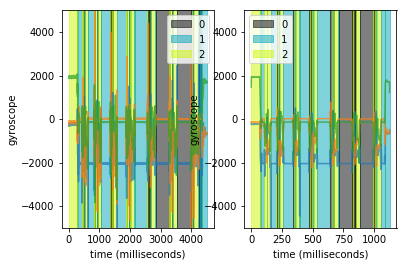

In [3]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt


def boundaries(v):
    bounds = [0] + list(np.where(v[:-1] != v[1:])[0] + 1) + [len(v)-1]
    return [(bounds[i], bounds[i+1], v[bounds[i]]) for i in range(len(bounds)-1)]

def to_range(l, cmap):
    total = cmap.N
    idx = int((l[-1] / N) * total)
    return cmap(idx)

FILE = 'data/pills-s0.npy'
FILE_2 = 'data/pills-s0_4.npy'

# PARAMETERS
N = 3
M = 10
covar = 'diag'
iters = 100


# TRAIN MODEL
X = np.load(FILE)
X2 = np.load(FILE_2)
model = hmm.GMMHMM(N,M,covariance_type=covar, n_iter=iters)
m2 = hmm.GMMHMM(N,M,covariance_type=covar, n_iter=iters)
# train
print('TRAINING MODEL: N={}, M={}, covar={}, iters={}'.format(N, M, covar, iters))
model.fit(X)
m2.fit(X2)
# retrieve hidden states
print('DONE TRAINING, PREDICTING OUTPUT')
Z = model.predict(X)
Z2 = model.predict(X2)
Zb = boundaries(Z)
Zb2 = boundaries(Z2)
print('DONE PREDICTING:', len(Zb), len(Zb2))
# print(Zb)

# PLOTTING
event_labels = {i:i for i in range(N)}
fig = plt.figure()
ax = fig.add_subplot(121)
# plot signals
ax.plot(X[:,:-3], alpha=.7)
ax.set_ylabel('gyroscope')
ax.set_xlabel('time (milliseconds)')
ax.set_ylim(-5000, 5000)
# plot labels
_cmap = plt.get_cmap('nipy_spectral')
plots = {}
for l in Zb:
    ev = event_labels[l[-1]]
    i = plt.axvspan(l[0], l[1], color=to_range(l, _cmap), alpha=0.5, label=ev)
    plots[ev] = i
# legend
print('plots', plots)
print('event_labels', event_labels)
legs = [plots[event_labels[i]] for i in sorted(event_labels)]
nms = [event_labels[i] for i in sorted(event_labels)]
plt.legend(legs, nms)



ax = fig.add_subplot(122)
# plot signals
ax.plot(X2[:,:-3], alpha=.7)
ax.set_ylabel('gyroscope')
ax.set_xlabel('time (milliseconds)')
ax.set_ylim(-5000, 5000)
# plot labels
_cmap = plt.get_cmap('nipy_spectral')
plots = {}
for l in Zb2:
    ev = event_labels[l[-1]]
    i = plt.axvspan(l[0], l[1], color=to_range(l, _cmap), alpha=0.5, label=ev)
    plots[ev] = i
# legend
print('plots', plots)
print('event_labels', event_labels)
legs = [plots[event_labels[i]] for i in sorted(event_labels)]
nms = [event_labels[i] for i in sorted(event_labels)]
plt.legend(legs, nms)




# draw
plt.show()

training: (4506, 6)
predicting: (4506, 6)
training: (1126, 6)
predicting: (1126, 6)
plotting: (4506, 6)
plotting: (1126, 6)


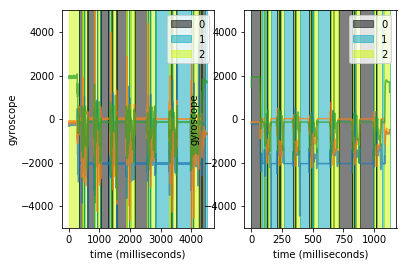

In [8]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def boundaries(v):
    bounds = [0] + list(np.where(v[:-1] != v[1:])[0] + 1) + [len(v)-1]
    return [(bounds[i], bounds[i+1], v[bounds[i]]) for i in range(len(bounds)-1)]

def to_range(l, cmap):
    total = cmap.N
    idx = int((l[-1] / N) * total)
    return cmap(idx)

def train_model(x, n=3, m=10, _covar='diag', _iters=100):
    model = hmm.GMMHMM(n,m,covariance_type=_covar, n_iter=_iters)
    print('training: {}'.format(x.shape))
    model.fit(x)
    print('predicting: {}'.format(x.shape))
    z = model.predict(x)
    return z

def plot_bounds(ax, x, z):
    Zb = boundaries(z)
    print('plotting: {}'.format(x.shape))
    event_labels = {i:i for i in range(N)}
    ax.plot(x[:,:-3], alpha=.7)
    ax.set_ylabel('gyroscope')
    ax.set_xlabel('time (milliseconds)')
    ax.set_ylim(-5000, 5000)
    # plot labels
    _cmap = plt.get_cmap('nipy_spectral')
    plots = {}
    for l in Zb:
        ev = event_labels[l[-1]]
        i = plt.axvspan(l[0], l[1], color=to_range(l, _cmap), alpha=0.5, label=ev)
        plots[ev] = i
    # legend
    legs = [plots[event_labels[i]] for i in sorted(event_labels)]
    nms = [event_labels[i] for i in sorted(event_labels)]
    plt.legend(legs, nms)


FILE = 'data/pills-s0.npy'
FILE_2 = 'data/pills-s0_4.npy'

# PARAMETERS
N = 3
M = 10
covar = 'diag'
iters = 100
params = [N, M, covar, iters]



X = np.load(FILE)
X2 = np.load(FILE_2)
Xi = [X, X2]
Zi = []

# TRAIN MODEL
for x in Xi:
    zi = train_model(x, *params)
    Zi.append(zi)

# PLOTTING
fig = plt.figure()
for i, (x,z) in enumerate(zip(Xi,Zi)):
    _ax = fig.add_subplot(1, len(Xi), i+1)
    plot_bounds(_ax, x, z)


# draw
plt.show()